based off of: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

input_data='/users/momori/data/international-airline-passengers.csv'
df = pd.read_csv(input_data)
df.columns=[['date','customers']]

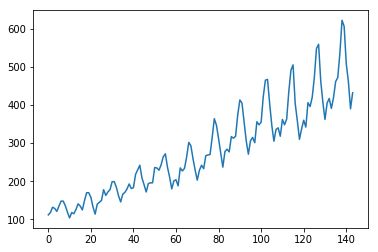

In [34]:
plt.plot([i for i in range(df.shape[0])],df['customers'])
plt.show()

In [30]:
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed()

In [42]:
df['month']=[i for i in range(df.shape[0])]


In [58]:
dataset = df[['month','customers']].values
dataset = dataset.astype('float32')

In [59]:
#scale dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
#dataset = dataset[:,1]

In [60]:
#split

train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size, :], dataset[train_size:len(dataset),:]
print len(train), len(test)

96 48


In [67]:
def create_dataset(dataset, look_back=1):
    datax, datay = [],[]
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 1]
        datax.append(a)
        datay.append(dataset[i+look_back, 1])
    return np.array(datax), np.array(datay)

In [68]:
look_back=1
trainx, trainy = create_dataset(train, look_back)
testx, testy = create_dataset(test, look_back)

In [99]:
list(trainx.reshape(94,))

a = [i for i in range(len(trainx))]
b = trainx

b

array([[ 0.01544401],
       [ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853],
       [ 0.05984557],
       [ 0.08494207],
       [ 0.08494207],
       [ 0.06177607],
       [ 0.02895753],
       [ 0.        ],
       [ 0.02702703],
       [ 0.02123553],
       [ 0.04247104],
       [ 0.07142857],
       [ 0.05984557],
       [ 0.04054055],
       [ 0.08687258],
       [ 0.12741312],
       [ 0.12741312],
       [ 0.10424709],
       [ 0.05598456],
       [ 0.01930502],
       [ 0.06949806],
       [ 0.07915059],
       [ 0.08880308],
       [ 0.14285713],
       [ 0.11389962],
       [ 0.13127413],
       [ 0.14285713],
       [ 0.18339768],
       [ 0.18339768],
       [ 0.15444016],
       [ 0.11196911],
       [ 0.08108109],
       [ 0.1196911 ],
       [ 0.12934363],
       [ 0.14671814],
       [ 0.17181468],
       [ 0.14864865],
       [ 0.15250966],
       [ 0.22007722],
       [ 0.24324325],
       [ 0.26640925],
       [ 0.2027027 ],
       [ 0

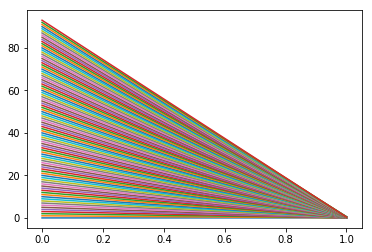

In [80]:
plt.plot([i for i in range(len(trainx)), list(trainx)])
plt.show()

In [100]:
trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))


In [101]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
model.fit(trainx, trainy, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0021
Epoch 2/100
 - 0s - loss: 0.0020
Epoch 3/100
 - 0s - loss: 0.0021
Epoch 4/100
 - 0s - loss: 0.0021
Epoch 5/100
 - 0s - loss: 0.0021
Epoch 6/100
 - 0s - loss: 0.0020
Epoch 7/100
 - 0s - loss: 0.0021
Epoch 8/100
 - 0s - loss: 0.0021
Epoch 9/100
 - 0s - loss: 0.0020
Epoch 10/100
 - 0s - loss: 0.0020
Epoch 11/100
 - 0s - loss: 0.0020
Epoch 12/100
 - 0s - loss: 0.0021
Epoch 13/100
 - 0s - loss: 0.0020
Epoch 14/100
 - 0s - loss: 0.0021
Epoch 15/100
 - 0s - loss: 0.0020
Epoch 16/100
 - 0s - loss: 0.0020
Epoch 17/100
 - 0s - loss: 0.0021
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0021
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [107]:
trainPredict = model.predict(trainx)
testPredict = model.predict(testx)

trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict=scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

trainScore = math.sqrt(mean_squared_error(trainy[0], trainpredict[:,0]))
print trainScore



ValueError: non-broadcastable output operand with shape (94,1) doesn't match the broadcast shape (94,2)

Epoch 1/100
 - 2s - loss: 0.0404
Epoch 2/100
 - 0s - loss: 0.0200
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0135
Epoch 5/100
 - 0s - loss: 0.0124
Epoch 6/100
 - 0s - loss: 0.0116
Epoch 7/100
 - 0s - loss: 0.0105
Epoch 8/100
 - 0s - loss: 0.0096
Epoch 9/100
 - 0s - loss: 0.0086
Epoch 10/100
 - 0s - loss: 0.0075
Epoch 11/100
 - 0s - loss: 0.0066
Epoch 12/100
 - 0s - loss: 0.0056
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0041
Epoch 15/100
 - 0s - loss: 0.0035
Epoch 16/100
 - 0s - loss: 0.0030
Epoch 17/100
 - 0s - loss: 0.0027
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0019
Epoch 29/100
 - 0s - loss: 0.0019
Epoch 30/100
 - 0s - lo

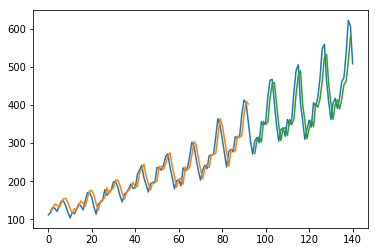

In [109]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/users/momori/data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()